# Bitcoin analysis and forecast based on historical trade data

### Readme

This is a test for me to get started with FB Prophet. The prediction and forecast is just for testing and should not be taken seriously. Of course, if the prediction and forecast is correct, I'll take all the honor and glory and you should hire me as a great data analyst. However, the analysis shows some interesting stuff nonetheless.


The trade data is from 2011-01-06 to 2018-03-04 and was modified in the way that a mean "y" column was added.

The prediction and forecast is for one year. 

We should check back latest 2019-03-04 to see if the forecast was correct and to make a new one ;)

### Resources
#### Prophet
https://research.fb.com/prophet-forecasting-at-scale/
#### Bitcoin trade data CSV
https://data.bitcoinity.org/markets/price/all/USD?c=e&t=l

In [1]:
import warnings
import datetime
import copy
import pandas as pd
from fbprophet import Prophet

warnings.filterwarnings('ignore')

dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S %Z') for d in dates]

df = pd.read_csv('bitcoin_trade_data_combined.CSV' ,parse_dates=['ds'], date_parser=dateparse, usecols=['ds', 'y'])
df.head()

,ds,y
0,2010-07-17,0.049510
1,2010-07-18,0.077975
2,2010-07-19,0.086792
3,2010-07-20,0.077999
4,2010-07-21,0.070463


We make a copy and extract the last 365 datapoints

In [2]:
dc = copy.deepcopy(df)
df_oy = dc[-365:]
df_oy.head()

,ds,y
2423,2017-03-05,1259.847148
2424,2017-03-06,1271.943358
2425,2017-03-07,1252.419780
2426,2017-03-08,1195.734754
2427,2017-03-09,1174.987293


In [3]:
m = Prophet(daily_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3148,2019-02-28
3149,2019-03-01
3150,2019-03-02
3151,2019-03-03
3152,2019-03-04


In [4]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3148,2019-02-28,16431.555018,14592.555130,18060.851890
3149,2019-03-01,16444.962015,14872.078353,17996.315289
3150,2019-03-02,16467.369873,14699.652126,18101.011037
3151,2019-03-03,16471.024775,14813.387933,18162.284443
3152,2019-03-04,16475.518202,14727.733991,18242.799427


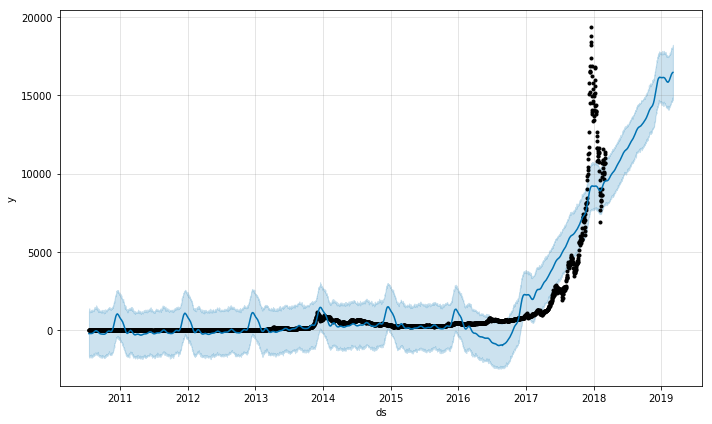

In [5]:
m.plot(forecast);

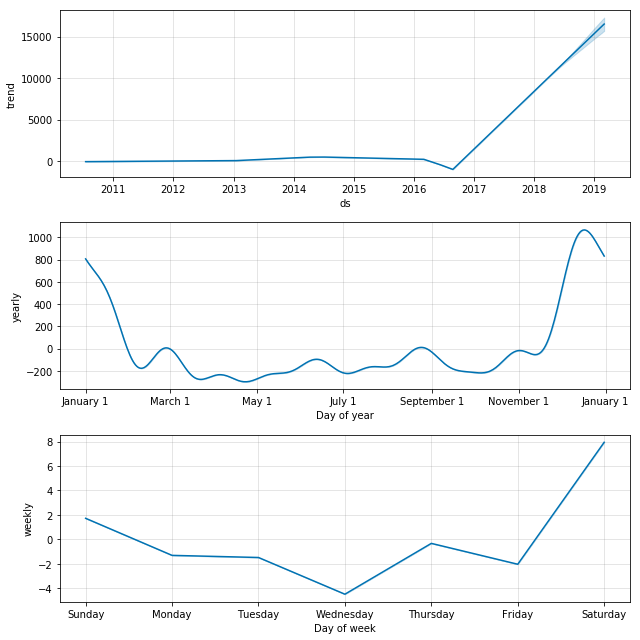

In [6]:
m.plot_components(forecast);

Now let's assume that the end of 2017 run was an outlier. We remove the outlier and see how the forecast changes

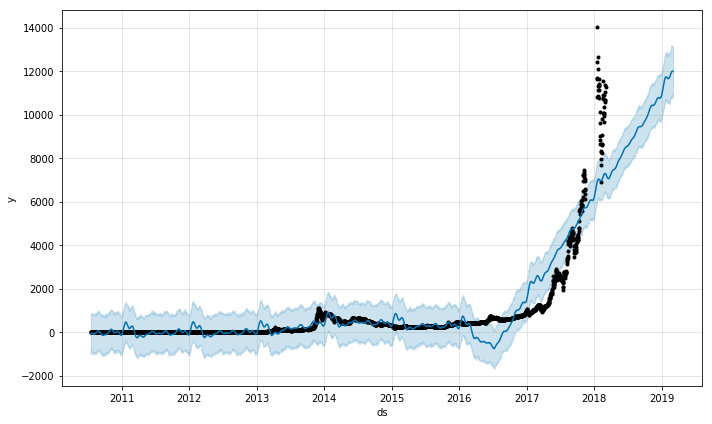

In [7]:
outlier_from = pd.Timestamp('2017-11-15')
outlier_to = pd.Timestamp('2018-01-15')
for x in range(1, len(df['ds'])):
    if (df['ds'][x] > outlier_from and df['ds'][x] < outlier_to):
        df['y'][x] = None
m_wo = Prophet(daily_seasonality=False)
m_wo.fit(df)
future_wo = m_wo.make_future_dataframe(periods=365)
forecast_without_outliers = m_wo.predict(future_wo)
m_wo.plot(forecast_without_outliers);

Finally we want to make a 60 day forecast based on last years data to show how important perspective is

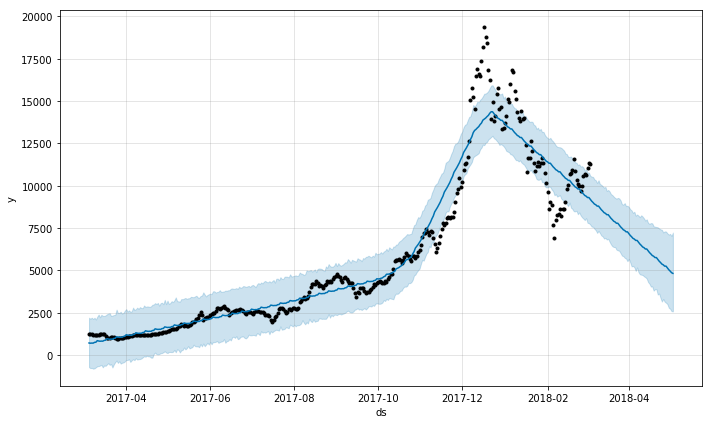

In [8]:
m_oy = Prophet(daily_seasonality=False, yearly_seasonality=False)
m_oy.fit(df_oy)
future_oy = m_oy.make_future_dataframe(periods=60)
forecast_oy = m_oy.predict(future_oy)
m_oy.plot(forecast_oy);